<a href="https://colab.research.google.com/github/vinybrasil/CiDAMO/blob/master/projeto_relmo/distancia_cosseno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/gentom/sentences-similarity-cluster.git
#copiar e colar para fora os que o sim_ckuster_cosseno precisa

#ach que só o levenshtein, mas como vou usar o cosseno, nao precisa

Cloning into 'sentences-similarity-cluster'...
remote: Enumerating objects: 173, done.
remote: Total 173 (delta 0), reused 0 (delta 0), pack-reused 173
Receiving objects: 100% (173/173), 26.46 KiB | 3.31 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [ ]:
#code from https://towardsdatascience.com/calculating-string-similarity-in-python-276e18a7d33a
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
sentences = ['lantern white ',
             'heart latern white',
             'letter g']

In [ ]:
def clean_string(text): #precisa?
  text = ''.join([word for word in text if word not in string.punctuation])
  text = text.lower() #talvez só deixar esse
  text = ' '.join([word for word in text.split() if word not in stopwords])

  return text

In [ ]:
#limpando
cleaned = list(map(clean_string, sentences))
cleaned

['lantern white', 'heart latern white', 'letter g']

In [ ]:
#vetorizando

vectorizer = CountVectorizer().fit_transform(cleaned)
vectors = vectorizer.toarray()
vectors

array([[0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0]])

In [ ]:
#matriz de similaridade

csim = cosine_similarity(vectors)
csim

array([[1.        , 0.40824829, 0.        ],
       [0.40824829, 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

In [ ]:
#funcao de similaridade entre duas strings

def cosine_sim_vectors(vec1, vec2):
  vec1 = vec1.reshape(1, -1)
  vec2 = vec2.reshape(1, -1)
  return cosine_similarity(vec1, vec2)[0][0]

  

In [ ]:
#teste 
cosine_sim_vectors(vectors[0], vectors[1])

0.408248290463863

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt
import sys
import codecs
import pandas as pd

def HierarchicalCluster(datafile):
    sim_list = []
    sim_matrix = []
    data_list = [line.rstrip('\n') for line in codecs.open(datafile, "r", "utf-8")]
    data_list = [line.split(",") for line in data_list]
    print(data_list)
    len_list = len(data_list)
    label_list = [data_list[l][0] for l in range(0,len(data_list))]
    text_list = [data_list[l][1] for l in range(0,len(data_list))]
    print(label_list)
    print(text_list)


    vectorizer = CountVectorizer().fit_transform(text_list)
    vectors = vectorizer.toarray()
    for i in range(0, len_list):
        #pivot = text_list[i]
        pivot = vectors[i]
        #print(pivot)
        print(((i - 1)/len_list)*100, "%")
        for j in range(0, len_list):
            #sim = distance(pivot, text_list[j]) # calcurate similarity(distance)
            #print('n{}, n{} : {}'.format(i, j, sim))
            #cosine_sim_vectors(pivot, text_list[j])
            sim = cosine_sim_vectors(pivot, vectors[j])
            sim_list.append(sim)
            if j == len_list-1:
                sim_matrix.append(sim_list)
                sim_list = []

    print('-------------------------')
    print('matrix: {}'.format(sim_matrix))
    linkage_matrix = ward(sim_matrix)
    print('--------------------------')
    dados = pd.DataFrame(linkage_matrix)
    dados.to_csv('matrix_final_cosseno_nomes_arrumados.csv')
    print(linkage_matrix)
    dendrogram(linkage_matrix, labels=label_list)
    plt.show()


[['', 'arrumadas_novamente_ultima'], ['0', 'heart holder'], ['1', 'metal lantern'], ['2', 'cream cupid hearts coat hanger'], ['3', 'union flag water bottle'], ['4', 'heart'], ['5', 'boxes'], ['6', 'glass star holder'], ['7', 'hand union jack'], ['8', 'hand warmer dot'], ['9', 'bird ornament'], ['10', 'playhouse bedroom'], ['11', 'playhouse kitchen'], ['12', 'feltcraft princess charlotte doll'], ['13', 'ivory cosy'], ['14', 'box colour teaspoons'], ['15', 'box vintage jigsaw blocks'], ['16', 'box vintage alphabet blocks'], ['17', 'home building block word'], ['18', 'love building block word'], ['19', 'recipe box heart'], ['20', 'england'], ['21', 'jam jars'], ['22', 'coat rack paris fashion'], ['23', 'coat rack paris fashion'], ['24', 'coat rack paris fashion'], ['25', 'bath building block word'], ['26', 'alarm clock bakelike pink'], ['27', 'alarm clock bakelike'], ['28', 'alarm clock bakelike green'], ['29', 'panda bunnies sheet'], ['30', 'stars tape'], ['31', 'globe'], ['32', 'vintage

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



--------------------------
[[1.00000000e+00 5.90000000e+01 0.00000000e+00 2.00000000e+00]
 [2.00000000e+00 3.87000000e+03 0.00000000e+00 2.00000000e+00]
 [1.47100000e+03 3.22700000e+03 0.00000000e+00 2.00000000e+00]
 ...
 [7.78800000e+03 7.78900000e+03 7.35074508e+01 3.46000000e+03]
 [7.76300000e+03 7.79000000e+03 9.87721478e+01 3.66100000e+03]
 [7.77000000e+03 7.79100000e+03 1.53578906e+02 3.89700000e+03]]


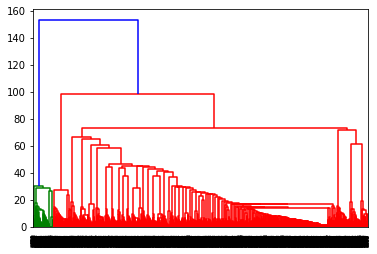

In [ ]:
HierarchicalCluster('/content/drive/My Drive/projeto_relmo/so_nomes_novos_arrumado.csv')